# Importación de Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.pipeline import make_pipeline, Pipeline
from imblearn.pipeline import Pipeline  # ✅ este sí permite SMOTE

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, roc_curve,accuracy_score, f1_score, precision_score, recall_score, RocCurveDisplay



# Lectura del archivo

In [3]:
water=pd.read_csv('water_potability.csv',sep=',')
water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


### EDA

In [4]:
# informacion de dataset
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
# Tipo de datos
water.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [6]:
#cantidad de valores nulos
water.isnull().sum()


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
#Porcentaje de valores nulos
(water.isnull().sum() / len(water)) * 100


ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [8]:
# cantidad de datos unicos numericos
water.select_dtypes(include=['int64']).nunique()

Potability    2
dtype: int64

array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>],
       [<Axes: title={'center': 'Potability'}>, <Axes: >, <Axes: >]],
      dtype=object)

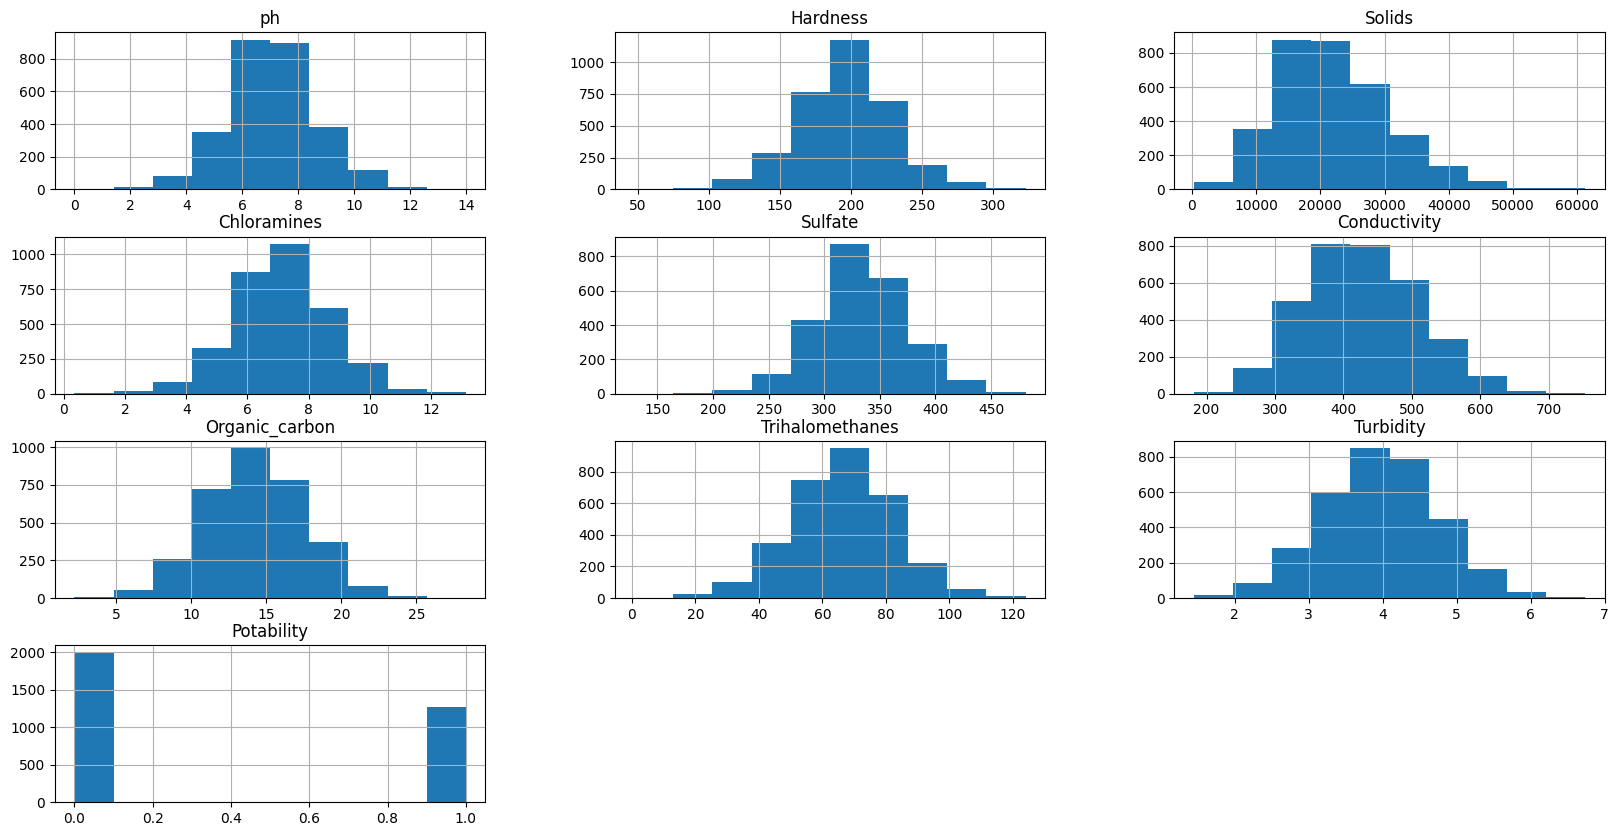

In [9]:

water.hist(figsize=(20,10))

### Discretización columna PH, Sulfate y Trihalomethanes

In [10]:
# Columnas numéricas con nulos
cols_con_nulos = water.select_dtypes(include='number').columns[water.isnull().any()]

# Diccionario para guardar los bins de cada columna
bins_dict = {}

# Discretización con manejo de nulos
for col in cols_con_nulos:
    try:
        # Aplicar qcut solo a los no nulos
        discretized, bins = pd.qcut(water[col], q=5, retbins=True, duplicates='drop')
        
        # Guardar los bins por si los querés usar después
        bins_dict[col] = bins
        
        # Asignar los valores discretizados a la misma columna
        water[col] = discretized
        
        # Convertir en categórica y agregar categoría para nulos
        water[col] = water[col].astype('category').cat.add_categories('Desconocido')
        water[col] = water[col].fillna('Desconocido')
    
    except Exception as e:
        print(f"Error en la columna {col}: {e}")

# Verificamos
for col in cols_con_nulos:
    print(f"\n{col} value counts:")
    print(water[col].value_counts())



ph value counts:
ph
(-0.001, 5.822]    557
(5.822, 6.702]     557
(6.702, 7.437]     557
(7.437, 8.311]     557
(8.311, 14.0]      557
Desconocido        491
Name: count, dtype: int64

Sulfate value counts:
Sulfate
Desconocido           781
(128.999, 301.074]    499
(301.074, 323.531]    499
(323.531, 342.095]    499
(342.095, 367.369]    499
(367.369, 481.031]    499
Name: count, dtype: int64

Trihalomethanes value counts:
Trihalomethanes
(0.737, 53.107]     623
(53.107, 62.656]    623
(70.446, 79.701]    623
(79.701, 124.0]     623
(62.656, 70.446]    622
Desconocido         162
Name: count, dtype: int64


In [11]:
#get dummies
water_dummies=pd.get_dummies(water)

### Modelo de Clasificación

In [12]:
X=water_dummies.drop(['Potability'],axis=1)
y=water_dummies['Potability']

In [13]:
y.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [14]:
print(X.shape,y.shape)

(3276, 24) (3276,)


In [15]:
RFC=RandomForestClassifier(n_estimators=1000, random_state=99, class_weight='balanced', min_samples_leaf=5, min_samples_split=10, max_depth=5)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=42, stratify=y, shuffle=True)

In [17]:
RFC.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=1000,
                       random_state=99)

In [18]:
RFC.score(X_test, y_test)

0.6666666666666666

In [19]:
y_pred=RFC.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1])

In [20]:
# Calculo de Acuracy de testing
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


In [21]:
# Calculo de Acuracy de train
accuracy_train = accuracy_score(y_train, RFC.predict(X_train))
print("Accuracy train:", accuracy_train)

Accuracy train: 0.7138016019716574


In [22]:
confusion_matrix(y_test,y_pred)

array([[11,  7],
       [ 3,  9]])

In [23]:
# calculo de clasification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.61      0.69        18
           1       0.56      0.75      0.64        12

    accuracy                           0.67        30
   macro avg       0.67      0.68      0.67        30
weighted avg       0.70      0.67      0.67        30



In [24]:
roc_auc_score(y_test,y_pred)

np.float64(0.6805555555555557)

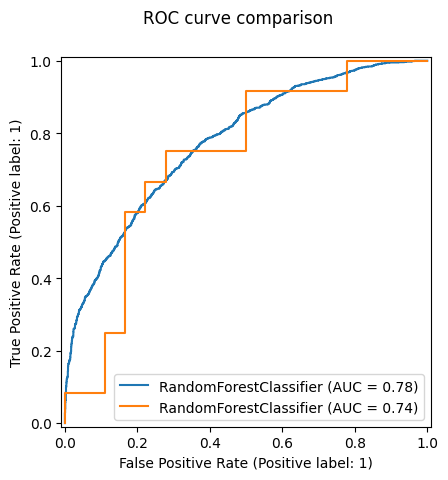

In [25]:
#Grafico de la curva ROC comparativa entre train y test


tr_disp = RocCurveDisplay.from_estimator(RFC, X_train, y_train)
ts_disp = RocCurveDisplay.from_estimator(RFC, X_test, y_test, ax=tr_disp.ax_)
ts_disp.figure_.suptitle("ROC curve comparison")

plt.show()

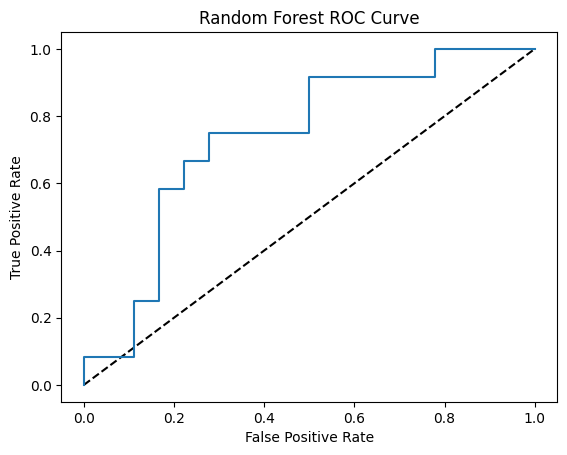

In [26]:
#Curva ROC para Test
fpr, tpr, thresholds = roc_curve(y_test, RFC.predict_proba(X_test)[:,1])

plt.plot([0, 1], [0, 1], 'k--')  # línea base
plt.plot(fpr, tpr)              # curva ROC

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

In [27]:
#calculando la probabilidad de prediccion
y_pred_probs=RFC.predict_proba(X_train)[:,1]
y_pred_probs

array([0.41634192, 0.45390616, 0.43392401, ..., 0.53091702, 0.45742271,
       0.46143402], shape=(3246,))

c:\Users\tomasito\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


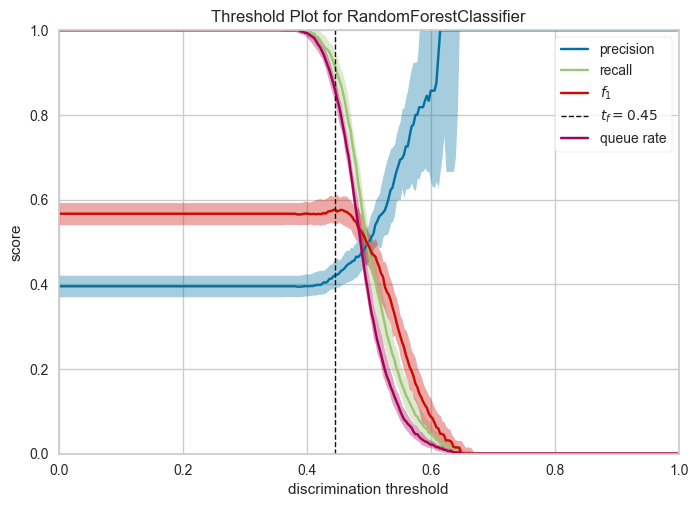

<Axes: title={'center': 'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [28]:
#punto de corte con graficamente
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(RFC)

visualizer.fit(X_train, y_train)        # Ajustar data al visualizador
visualizer.show()   

In [29]:
# Guardar las columnas 
with open('categories_ohe.pickle', 'wb') as handle:
    pickle.dump(X.columns, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [30]:
# Guardar el modelo entrenado
#with open('RF.pickle', 'wb') as f:
  #  pickle.dump(RFC, f)

In [31]:
filename = 'RFC.pickle'
pickle.dump(RFC, open(filename, 'wb')) # rf = nuestro modelo

### Buscando el mejor parametro

In [32]:
param_grid = {
    'max_depth': [5, 7,9],
    'min_samples_split':[5,10,20],
    'min_samples_leaf':[5,10,15], 
}

In [33]:
kf=KFold(n_splits=6, shuffle=True,random_state=42)

In [34]:
grid = GridSearchCV(RandomForestClassifier(random_state=99, n_estimators=1000,class_weight='balanced'), param_grid, cv=kf, scoring='accuracy')

In [35]:
grid.fit(X,y)

GridSearchCV(cv=KFold(n_splits=6, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_estimators=1000,
                                              random_state=99),
             param_grid={'max_depth': [5, 7, 9],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 20]},
             scoring='accuracy')

In [36]:
grid.best_score_

np.float64(0.6309523809523809)

In [37]:
grid.best_params_

{'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 5}

In [38]:
grid.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=9, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=1000, random_state=99)

In [39]:
best_RFC= grid.best_estimator_

In [40]:
best_RFC.fit(X,y)

RandomForestClassifier(class_weight='balanced', max_depth=9, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=1000, random_state=99)

In [41]:
best_RFC.score(X_test,y_test)

0.8666666666666667

In [42]:
#instanciamos y predecimos los datos de testing
y_pred1=best_RFC.predict(X_test)
y_pred1

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1])

In [43]:
# Calculo de Acuracy de testing
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


In [44]:
# Calculo de Acuracy de train
accuracy_train = accuracy_score(y_train, best_RFC.predict(X_train))
print("Accuracy train:", accuracy_train)

Accuracy train: 0.8524337646333949


In [45]:
confusion_matrix(y_test,y_pred1)

array([[15,  3],
       [ 1, 11]])

In [46]:
# calculo de clasification report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        18
           1       0.79      0.92      0.85        12

    accuracy                           0.87        30
   macro avg       0.86      0.88      0.86        30
weighted avg       0.88      0.87      0.87        30



<Axes: xlabel='Pred', ylabel='Actual'>

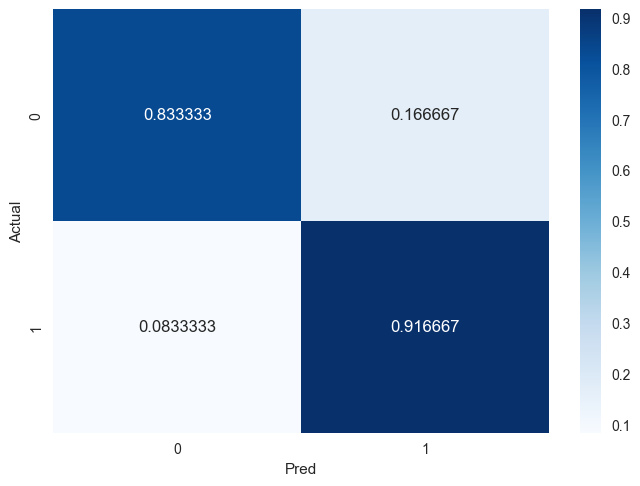

In [47]:
conf_mat2=pd.crosstab(index=y_test, # ¡cambio!
                      columns=y_pred1,      # ¡cambio!
                      rownames=['Actual'], 
                      colnames=['Pred'],
                      normalize='index') #normalizado por fila

sns.heatmap(conf_mat2, annot=True, cmap='Blues', fmt='g')

In [48]:
#Area bajo la curva
roc_auc_score(y_test,y_pred1)

np.float64(0.8749999999999999)

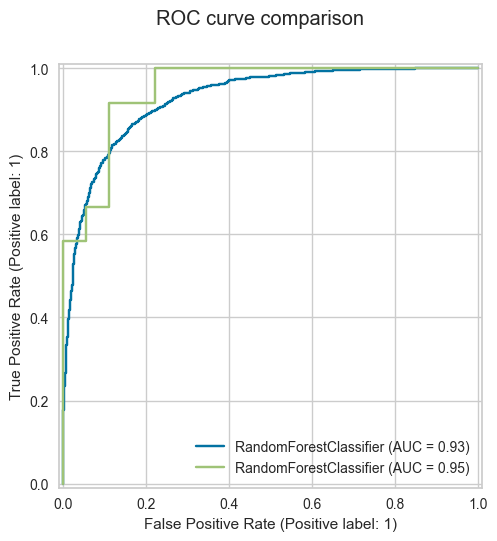

In [49]:
#Grafico de la curva ROC comparativa entre train y test


tr_disp = RocCurveDisplay.from_estimator(best_RFC, X_train, y_train)
ts_disp = RocCurveDisplay.from_estimator(best_RFC, X_test, y_test, ax=tr_disp.ax_)
ts_disp.figure_.suptitle("ROC curve comparison")

plt.show()

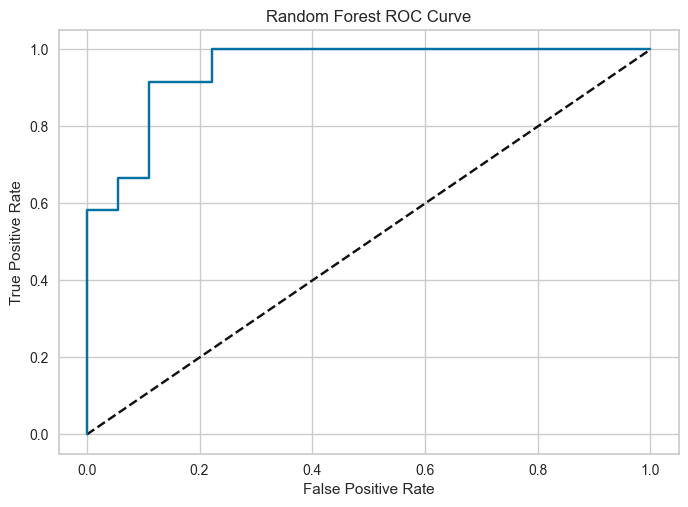

In [50]:
#Curva ROC para Test
fpr, tpr, thresholds = roc_curve(y_test, best_RFC.predict_proba(X_test)[:,1])

plt.plot([0, 1], [0, 1], 'k--')  # línea base
plt.plot(fpr, tpr)              # curva ROC

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

c:\Users\tomasito\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


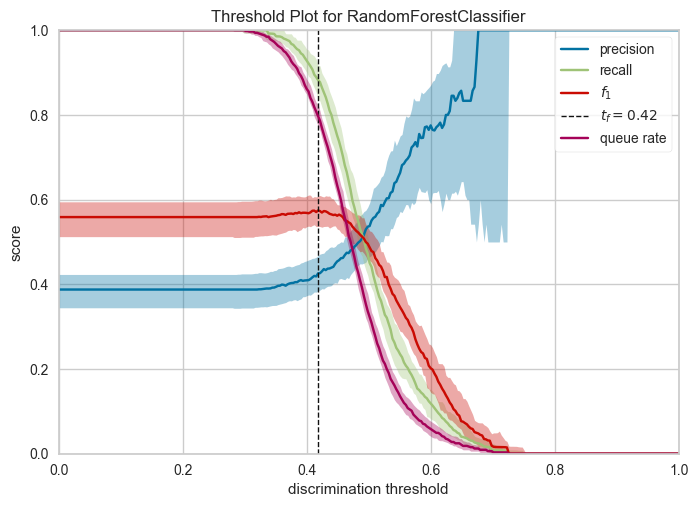

<Axes: title={'center': 'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [51]:
#punto de corte con graficamente
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(best_RFC)

visualizer.fit(X_train, y_train)        # Ajustar data al visualizador
visualizer.show()      

### Validacion

In [52]:
cv_result=cross_val_score(best_RFC,X,y,cv=kf,scoring='roc_auc')

In [53]:
cv_result

array([0.6540968 , 0.6735551 , 0.64559507, 0.60952619, 0.62272131,
       0.67320426])

In [54]:
np.mean(cv_result)

np.float64(0.6464497901149433)

In [55]:
filename = 'best_RFC.pickle'
pickle.dump(best_RFC, open(filename, 'wb')) # rf = nuestro modelo

In [56]:
pip install fastapi

Note: you may need to restart the kernel to use updated packages.
